##  Sobel Filter

In [1]:
//load ImageJ
%classpath config resolver scijava.public https://maven.scijava.org/content/groups/public
%classpath add mvn net.imagej imagej 2.0.0-rc-67

//create ImageJ object
ij = new net.imagej.ImageJ()

Added new repo: scijava.public


net.imagej.ImageJ@3baf5137

This `Op` performs edge detection on an image using the [Sobel operator](https://en.wikipedia.org/wiki/Sobel_operator). Let's see how this `Op` is called:

In [2]:
ij.op().help("sobel")

Available operations:
	(RandomAccessibleInterval out?) =
	net.imagej.ops.filter.sobel.SobelRAI(
		RandomAccessibleInterval out?,
		RandomAccessibleInterval in)

Let's get an input image to show how this `Op` works:

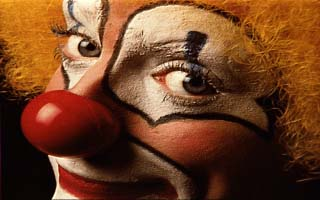

In [3]:
input = ij.scifio().datasetIO().open("http://imagej.net/images/clown.png")

//convert the img to FloatType to make the sobel smoother
converted = ij.op().run("convert.float32", input)

ij.notebook().display(converted)

Now that we have our input image, let's pass it to the algorithm:

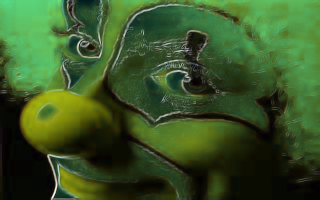

In [4]:
import net.imagej.ops.special.function.Functions

output = ij.op().run("sobel", converted)

ij.notebook().display(output)

Note that the `Op` detects edges in all dimensions of the image (including color channels), hence the yellow nose (the sobel filter detects the large difference between the low blue value and the higher green and red values as an edge, hence high red and green in the output leading to yellow) and blue and green hair (for a similar reason). If we just want black and white edges we can run on a `HyperSlice` of the original image:

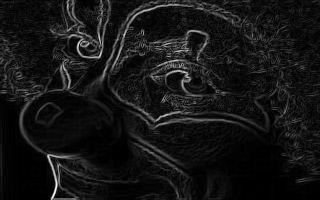

In [5]:
//get the first z-slice of the channel dimension (i.e. zeroth index of dimension 2)
hyperSlice = ij.op().run("hyperSliceView", converted, 2, 0)

outputSlice = ij.op().run("sobel", hyperSlice)

ij.notebook().display(outputSlice)